Firstly import all necessary libraries for performing the task

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# loading the data from csv file to a Pandas DataFrame
patient_data = pd.read_csv('/content/diabetes.csv')

In [4]:
# first 5 rows in the dataframe
patient_data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#deleting the last column
patient_data.drop('Outcome',axis='columns',inplace=True)

In [6]:
#fetching the information about the input dataset
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [7]:
patient_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
# checking for missing values
patient_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [9]:
#fetching the no of rows and columns have in our dataset
patient_data.shape

(768, 8)

Choosing the columns(features) for clustering the patients based on their feature values

In [10]:
data=patient_data[['Age','Glucose']]

Below method is used for finding the best number of cluters to divide the data

In [11]:
Iner = []
NO = []
for i in range(1,10):
  KMEANS =  KMeans(n_clusters=i).fit(data)
  Iner.append(KMEANS.inertia_)
  NO.append(i)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Plotting the elbow graph

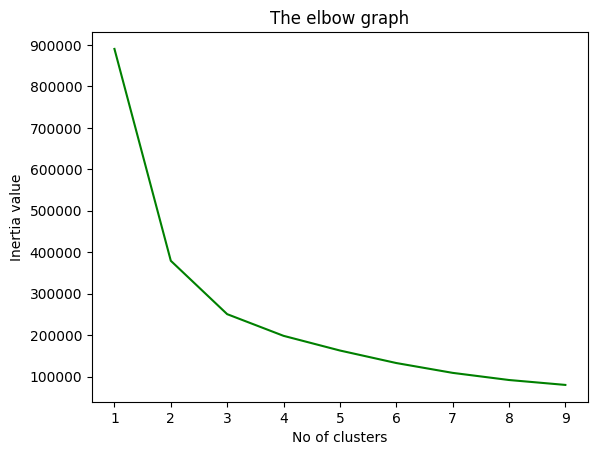

In [12]:
plt.title("The elbow graph")
plt.xlabel("No of clusters")
plt.ylabel("Inertia value")
plt.plot(NO, Iner,c="green")

By observing the above data,we can conclude that dividing the patient data in to four clusters is suitable for better understanding.

In [13]:
KMEANS =  KMeans(n_clusters=4).fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
data["C"] = KMEANS

<ipython-input-14-3efda0a046e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["C"] = KMEANS


In [15]:
KMEANS

array([0, 1, 2, 1, 0, 3, 1, 3, 2, 0, 3, 2, 0, 2, 2, 3, 3, 3, 3, 3, 0, 3,
       2, 3, 0, 0, 0, 3, 0, 3, 3, 2, 1, 1, 0, 3, 0, 3, 1, 3, 2, 0, 3, 2,
       2, 2, 0, 1, 3, 3, 3, 3, 1, 2, 0, 1, 2, 3, 0, 3, 1, 0, 1, 0, 3, 3,
       3, 3, 3, 0, 3, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 1, 1, 3, 0, 3, 3, 3,
       0, 3, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 3, 0, 1, 3,
       2, 2, 1, 1, 2, 0, 0, 1, 3, 3, 2, 3, 3, 0, 3, 1, 3, 3, 3, 3, 2, 0,
       2, 1, 3, 0, 3, 1, 0, 3, 0, 3, 3, 3, 0, 3, 1, 3, 0, 1, 0, 3, 2, 0,
       2, 0, 3, 3, 1, 2, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 1, 3, 1, 1, 0, 2, 2, 0, 3, 0, 3, 0, 2, 0, 1, 2, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 2, 2, 3, 2, 1, 0, 2, 0, 3, 0, 3, 0, 1, 3,
       2, 2, 3, 0, 3, 1, 3, 2, 2, 3, 0, 0, 1, 0, 1, 2, 2, 2, 2, 3, 1, 1,
       0, 3, 0, 2, 0, 2, 0, 3, 3, 0, 1, 1, 3, 3, 3, 3, 2, 2, 2, 0, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 3, 0,
       2, 3, 3, 3, 1, 3, 0, 0, 2, 0, 0, 0, 3, 3, 2,

In [16]:
cent = KMeans(n_clusters=3).fit(data).cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


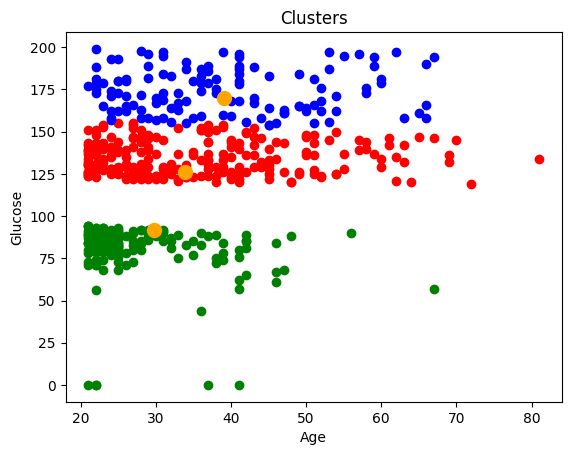

In [17]:
plt.title("Clusters")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.scatter(data[data["C"]==0]['Age'], data[data["C"]==0]['Glucose'],c="r")
plt.scatter(data[data["C"]==1]['Age'], data[data["C"]==1]['Glucose'],c="g")
plt.scatter(data[data["C"]==2]['Age'], data[data["C"]==2]['Glucose'],c="b")

plt.scatter(cent[:,0], cent[:,1],s = 100,c='orange')

**INSIGHTS:**

=> By observing the above plot,it groups the clusters based on their values of age and glucose

=>The doctor can give same treatment to the people belonging to the same cluster group

=>By observing the clusters,we can say that all age groups consists all range of glucose values

=>majority 20-40 age people have Glucose levels(75-100 and 125-150)

=>By increasing the age of peoples,the glucose levels were quite increasing

=>Majority of 20-35 age group are maintaining the good glucose levels

=>Less number of 20-35 age group are not maintaining the good glucose levels

**Validation**

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics


**Silhouette Score:** Silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [19]:
# Silhouette Score
silhouette_score = metrics.silhouette_score(data,data["C"],metric='euclidean')
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.3641402775650664


**Conclusion**

From the above model we can say that, the Silhouette Score is quite close to 1.so it means the clustering of the data is well.

from this we can easily classify the patients based on the input parameters and give treatment according to that.